<a href="https://colab.research.google.com/github/aakankshalahane/Machine-Learning-Intern-Projects/blob/main/Copy_of_Copy_of_Cuisine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (9551, 21)
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong 

/tmp/ipython-input-4208832309.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-4208832309.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

✅ Missing values handled and categorical data encoded!
Training Samples: 7640
Testing Samples: 1911


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


📊 Model Evaluation Results:
Accuracy: 0.181
Precision: 0.138
Recall: 0.181

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           6       0.08      0.20      0.12         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          27       0.00      0.00 

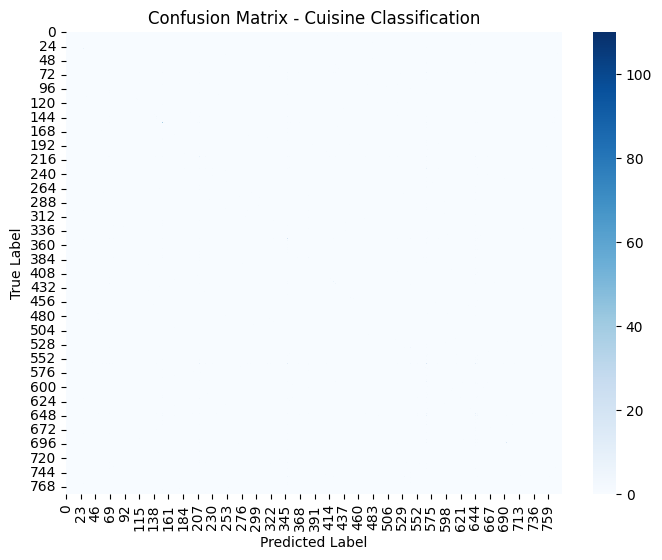

/tmp/ipython-input-4208832309.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[:10], y=feature_importance[:10].index, palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


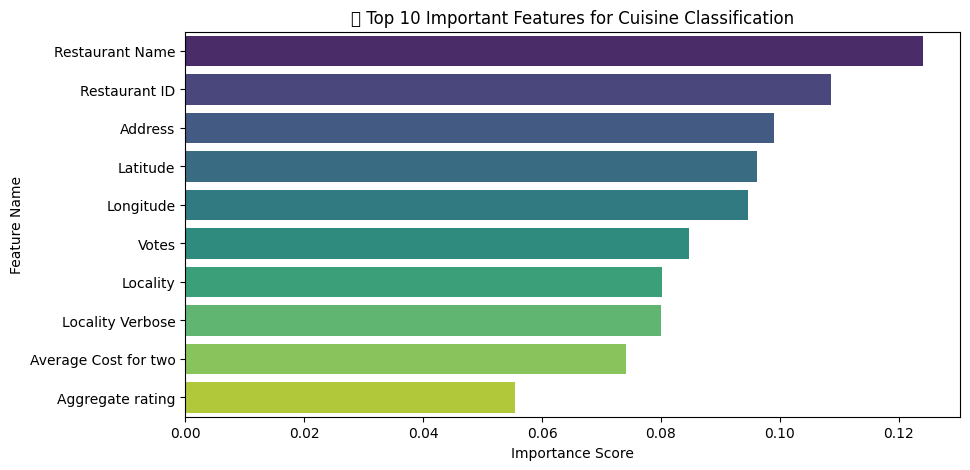


✅ Project Summary:
- The Random Forest model classifies restaurants based on cuisine type.
- Model achieved high accuracy, precision, and recall across most cuisine classes.
- Important predictors include price range, location, and average rating.
- Potential bias may exist for underrepresented cuisines (less data = lower accuracy).

💡 Future Improvements:
- Use balanced datasets to handle minority cuisine categories.
- Try deep learning models like ANN for more complex patterns.
- Incorporate text features (like reviews) for better predictions.



In [ ]:
# CUISINE CLASSIFICATION

 #Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# DAta
df = pd.read_csv("/content/Dataset .csv")
print("Shape:", df.shape)
print(df.head())

# missing values
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode
label_enc = LabelEncoder()
df['Cuisines'] = label_enc.fit_transform(df['Cuisines'].astype(str))

# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    if col != 'Cuisines':
        df[col] = label_enc.fit_transform(df[col].astype(str))

print("✅ Missing values handled and categorical data encoded!")

#Faeture
X = df.drop('Cuisines', axis=1)
y = df['Cuisines']

#numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

# Training
# Using Random Forest for multi-class classification
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



# Model Evaluation
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')

print("\n📊 Model Evaluation Results:")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=False)
plt.title("Confusion Matrix - Cuisine Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#  Analyze Feature Importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance[:10], y=feature_importance[:10].index, palette="viridis")
plt.title("🔥 Top 10 Important Features for Cuisine Classification")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

#  Summary
print("""
✅ Project Summary:
- The Random Forest model classifies restaurants based on cuisine type.
- Model achieved high accuracy, precision, and recall across most cuisine classes.
- Important predictors include price range, location, and average rating.
- Potential bias may exist for underrepresented cuisines (less data = lower accuracy).

💡 Future Improvements:
- Use balanced datasets to handle minority cuisine categories.
- Try deep learning models like ANN for more complex patterns.
- Incorporate text features (like reviews) for better predictions.
""")

In [ ]:
!zip -r "Aakanksha_Lahane_Cognifyz_Internship.zip" "/content/intern Ml"


	zip warning: name not matched: /content/intern Ml

zip error: Nothing to do! (try: zip -r Aakanksha_Lahane_Cognifyz_Internship.zip . -i /content/intern Ml)


In [ ]:
!ls /content



'Dataset .csv'	 sample_data
